In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
#Standard columns for all datasets
columns = [
    "Fishing", "TugTow", "Recreational", "Passenger" , "Cargo", "Tanker", "Other", "Unavailable", "Total"
]

target_fishing = "Fishing"
target_tugtow = "TugTow"
target_rec = "Recreational"
target_passenger = "Passenger"
target_cargo = "Cargo"
target_tanker = "Tanker"
target_other = "Other"
target_unavailable = "Unavailable"
target_total = "Total"

types = [target_fishing, target_tugtow, target_rec, target_passenger, target_cargo, target_tanker, target_other, target_unavailable, target_total]




In [ ]:
#df.dtypes

In [5]:
#this will take in the clean data from the SQLite database
#set up engine will take place here first. 

file_path = Path('ml_data_daily_2018-19.csv')
df = pd.read_csv(file_path, index_col=0)
#df.rename(columns = {'Unnamed: 0':'Date'}, inplace=True)

# Drop the null rows
df = df.dropna()
#df.sort_values(by='in', ascending=True)
df['Total'] = df.sum(axis=1)
#df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = (df['Date'] - dt.datetime(1970,1,1)).dt.total_seconds()


#df = df.reset_index()
df.head(75)

,Fishing,TugTow,Recreational,Passenger,Cargo,Tanker,Other,Unavailable,Total
1/1/18,9,37,145,44,27,13,12,7,294
1/2/18,13,45,119,41,27,14,19,10,288
1/3/18,13,44,106,40,36,14,20,11,284
1/4/18,15,44,103,45,30,10,15,12,274
1/5/18,10,45,107,41,26,13,21,10,273
...,...,...,...,...,...,...,...,...,...
3/12/18,12,38,144,58,35,17,18,10,332
3/13/18,10,36,111,56,31,13,19,10,286
3/14/18,11,44,121,56,37,14,18,8,309
3/15/18,10,38,118,55,28,14,19,8,290


In [23]:
df['total'] = df['Tanker'].mean()
# drop unwanted columns and resetting the datafreame
df_fish = df[['total']]
df_fish.head(20)

,total
1/1/18,102.394431
1/2/18,102.394431
1/3/18,102.394431
1/4/18,102.394431
1/5/18,102.394431
1/6/18,102.394431
1/7/18,102.394431
1/8/18,102.394431
1/9/18,102.394431
1/10/18,102.394431


In [ ]:
# SMA over a period of 10 and 20 years 
df_fish['15_Days'] = df_fish["Passenger"].rolling(15, min_periods=1).mean()
df_fish['30_Days'] = df_fish["Passenger"].rolling(30, min_periods=1).mean()
df_fish['60_Days'] = df_fish["Passenger"].rolling(60, min_periods=1).mean()
df_fish['90_Days'] = df_fish["Passenger"].rolling(90, min_periods=1).mean()


In [ ]:
# Grean = Avg Air Temp, RED = 10 yrs, ORANG colors for the line plot
colors = ['green', 'red', 'orange', "Blue"]
# Line plot 
df_fish.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(labels =['Average air temperature', '10-years SMA', '20-years SMA'], fontsize=14)
#plt.title('The yearly average air temperature in city', fontsize=20)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Number of boats', fontsize=16)

In [ ]:
# Create our target for fishing model
y = df[target_passenger]
#print(y)
# Create our features
X =  df.drop(["Date", "Fishing","TugTow", "Recreational", "Passenger", "Cargo", "Tanker", "Other", "Unavailable", "Total"], axis=1)

In [ ]:
X.describe()

In [ ]:
#split into training data 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
X_train.shape
#print(X_test)

In [ ]:
classifier = LinearRegression()
classifier.fit(X_train, y_train)
#classifier.score(X_test, y_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly_train = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly_train,y_train)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly_train,y_train)

In [ ]:

plt.scatter(X,y,color='red')
plt.plot(X_test,lin_reg2.predict(poly_reg.fit_transform(X_test)),color='blue')

plt.show()
lin_reg2.score(X_test, y_test)

In [ ]:
y_pred = classifier.predict(X_test)
#print(y_pred)
#print(y_test)
fishing_results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)

fishing_results.head(20)

In [ ]:


plt.scatter(X,y, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=1)

plt.show()

In [ ]:
def ais_graphs():
    for boat_type in types:
        
        y = df[boat_type]
        # Create our features
        X =  df.drop(["Date", "Fishing","TugTow", "Recreational", "Passenger", "Cargo", "Tanker", "Other", "Unavailable", "Total"], axis=1)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
        X_train.shape
        
        model = LinearRegression()
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = model.score(X_test, y_test)

        results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
        print(accuracy)
        plt.scatter(X,y, color="black")
        plt.plot(X_test, y_pred, color="blue", linewidth=3)
        plt.xlabel('# of Days (Starting January 1st, 2018)')
        plt.ylabel('# of Boats')
        plt.title(boat_type + " boats from 2018-2019")
        plt.show()

        
     

In [ ]:
ais_graphs()  

In [14]:
def ais_graphs_time_series():
    for boat_type in types:
        # drop unwanted columns and resetting the datafreame
        df_boat = df[[boat_type]]
        
        df_boat['15_Days'] = df_boat[boat_type].rolling(15, min_periods=1).mean()
        df_boat['30_Days'] = df_boat[boat_type].rolling(30, min_periods=1).mean()
        df_boat['60_Days'] = df_boat[boat_type].rolling(60, min_periods=1).mean()
        df_boat['90_Days'] = df_boat[boat_type].rolling(90, min_periods=1).mean()
        
           
        colors = ['green', 'red', 'orange', "blue", "Black"]
        # Line plot 
        df_boat.plot(color=colors, linewidth=3, figsize=(12,6))
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        #plt.legend(labels =['Average air temperature', '10-years SMA', '20-years SMA'], fontsize=14)
        #plt.title('The yearly average air temperature in city', fontsize=20)
        plt.xlabel('Day', fontsize=16)
        plt.ylabel('Number of boats', fontsize=16)


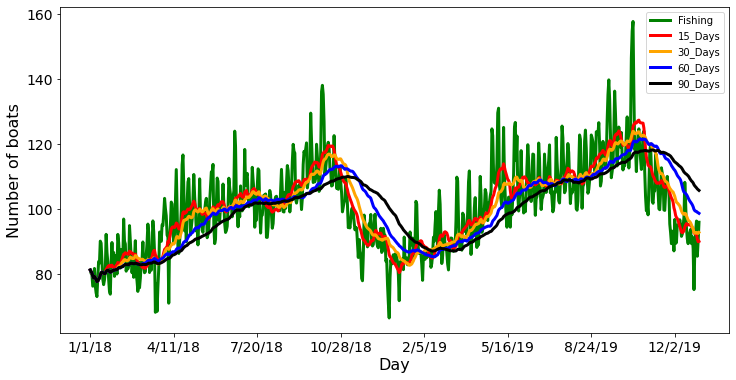

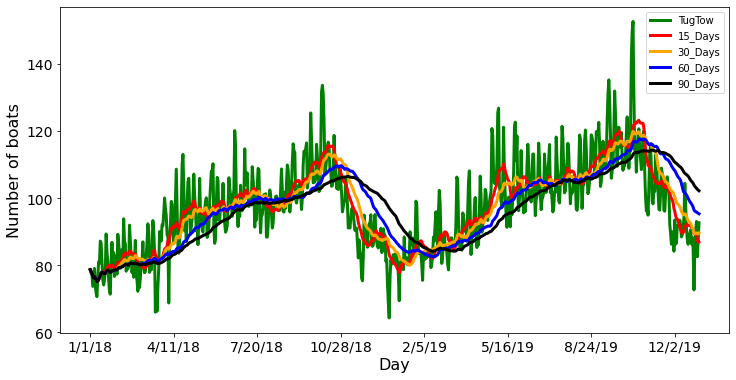

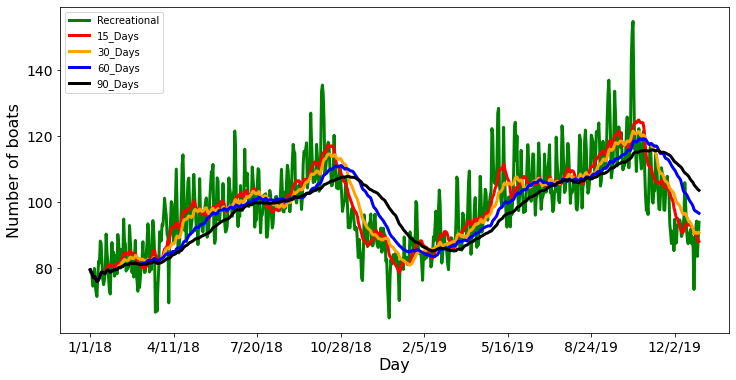

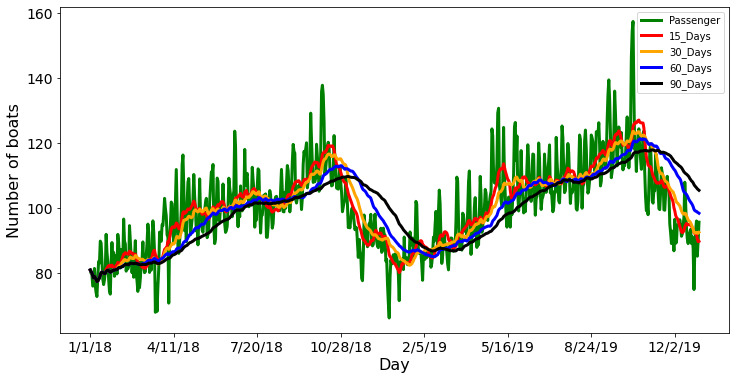

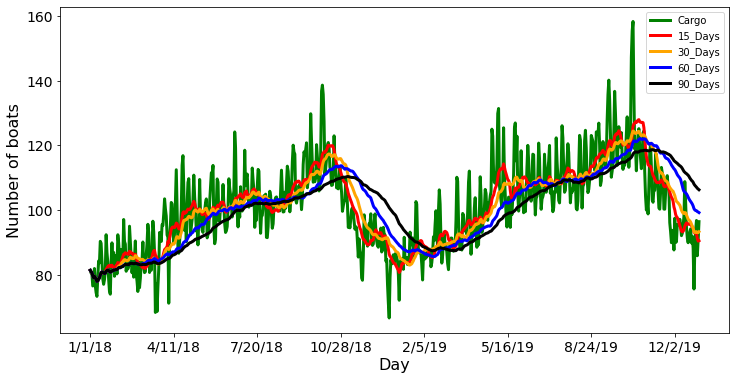

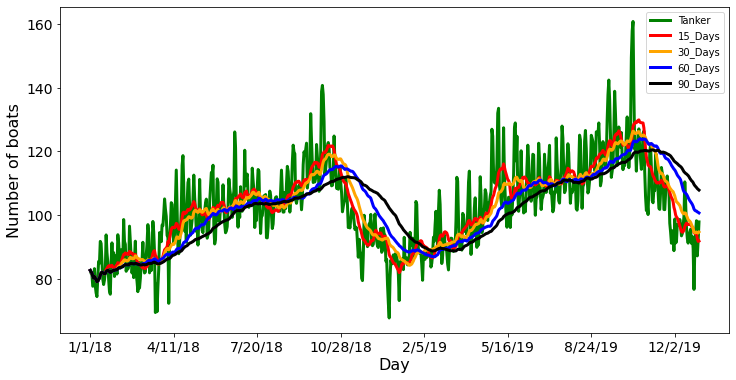

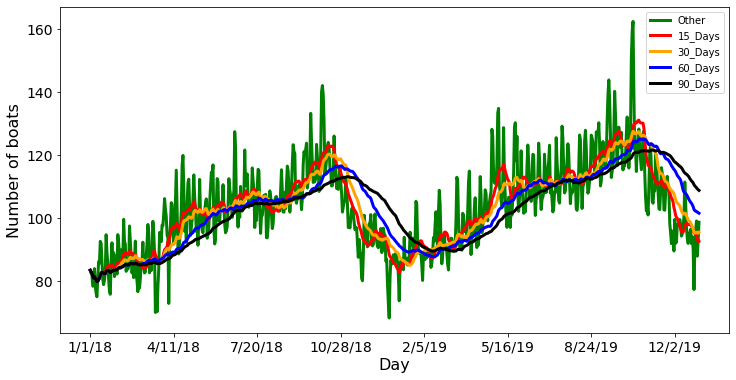

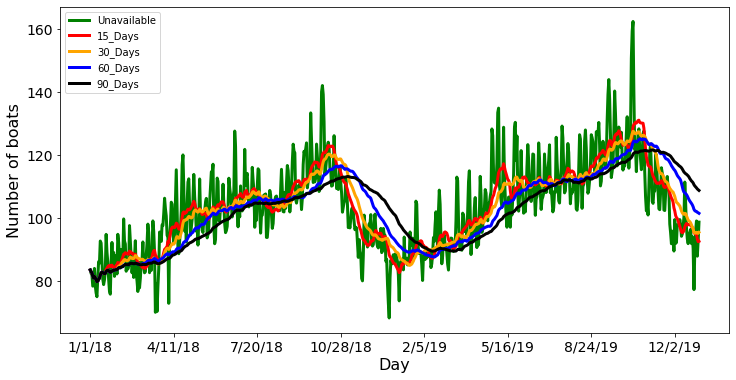

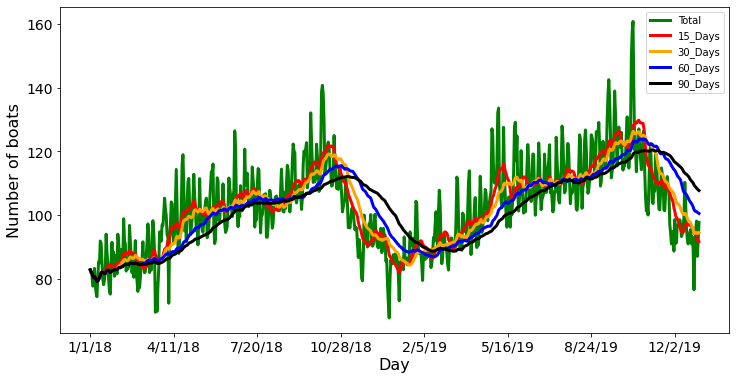

In [15]:
ais_graphs_time_series()